run this command in the terminal before running any code

source env/bin/activate


## Visualising Some Images

In [2]:
import matplotlib
print(matplotlib.__version__)


3.3.4


/Users/abdul/Documents/GitHub/css2-repo/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/abdul/Documents/GitHub/css2-repo/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/abdul/Documents/GitHub/css2-repo/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/abdul/Documents/GitHub/css2-repo/env/

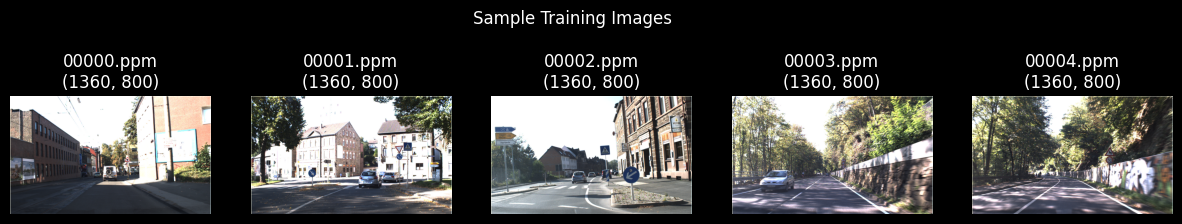

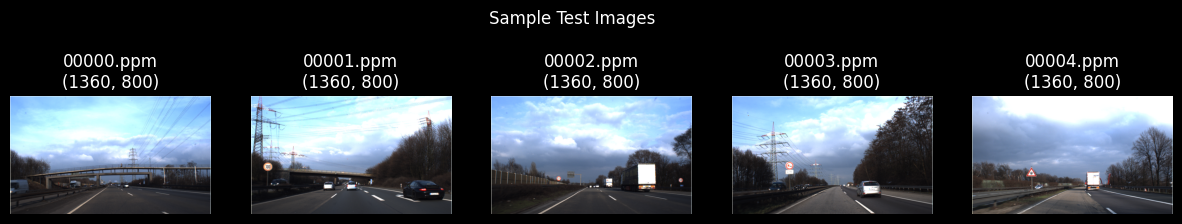

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import os

def display_images(image_files, directory, title):
    plt.figure(figsize=(15, 3))
    for i, image_file in enumerate(image_files):
        if image_file.endswith('.ppm'):  # Ensure we're only trying to open image files
            img = Image.open(os.path.join(directory, image_file))
            plt.subplot(1, len(image_files), i+1)
            plt.imshow(img)
            plt.title(f"{image_file}\n{img.size}")
            plt.axis('off')
    plt.suptitle(title)
    plt.show()

train_dir = '42_class_data/TrainIJCNN2013/TrainIJCNN2013'
test_dir = '42_class_data/TestIJCNN2013/TestIJCNN2013Download'

train_images = sorted([file for file in os.listdir(train_dir) if file.endswith('.ppm')])[:5]
test_images = sorted([file for file in os.listdir(test_dir) if file.endswith('.ppm')])[:5]

display_images(train_images, train_dir, "Sample Training Images")
display_images(test_images, test_dir, "Sample Test Images")


## Distribution of Classes

In [7]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }


/Users/abdul/Documents/GitHub/css2-repo/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/abdul/Documents/GitHub/css2-repo/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/abdul/Documents/GitHub/css2-repo/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/abdul/Documents/GitHub/css2-repo/env/

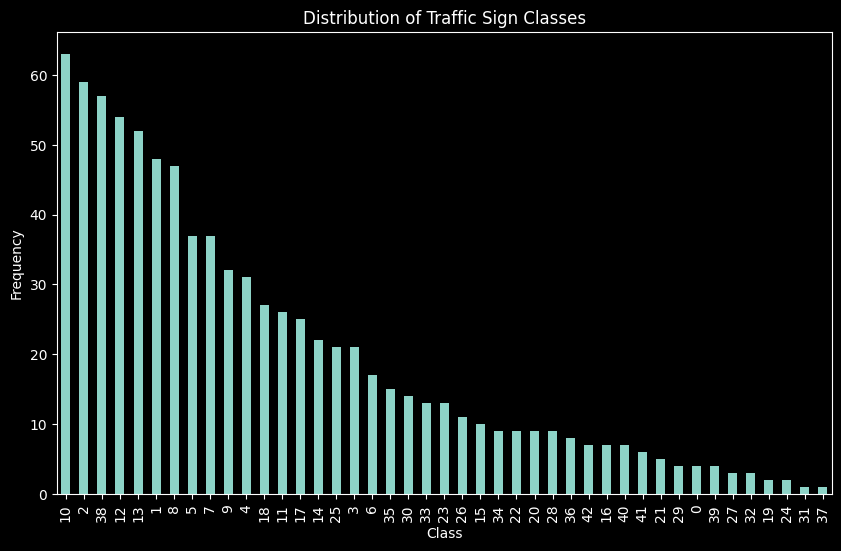

In [4]:
import pandas as pd

# Reading the bounding box and class info
gt_path = '42_class_data/gt.txt'
gt_data = pd.read_csv(gt_path, sep=';', header=None, names=['Filename', 'X1', 'Y1', 'X2', 'Y2', 'Class'])



# Plotting the distribution of classes
plt.figure(figsize=(10, 6))
gt_data['Class'].value_counts().plot(kind='bar')
plt.title('Distribution of Traffic Sign Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


/Users/abdul/Documents/GitHub/css2-repo/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/abdul/Documents/GitHub/css2-repo/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/abdul/Documents/GitHub/css2-repo/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/abdul/Documents/GitHub/css2-repo/env/

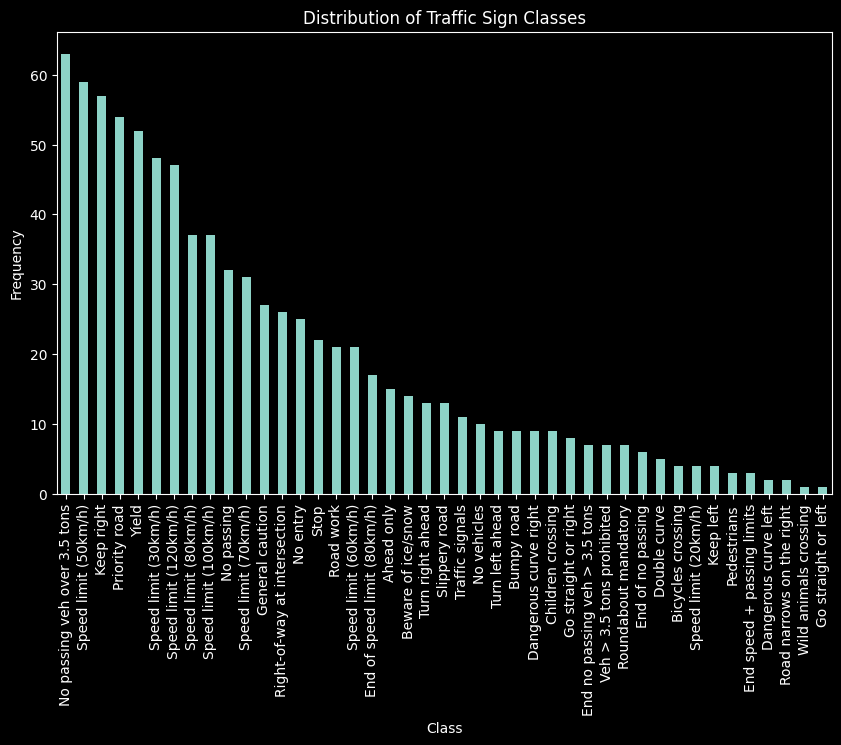

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the class-label dictionary
classes = {
    0: 'Speed limit (20km/h)',
    1: 'Speed limit (30km/h)',
    2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)',
    4: 'Speed limit (70km/h)',
    5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)',
    7: 'Speed limit (100km/h)',
    8: 'Speed limit (120km/h)',
    9: 'No passing',
    10: 'No passing veh over 3.5 tons',
    11: 'Right-of-way at intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Veh > 3.5 tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve left',
    20: 'Dangerous curve right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End speed + passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End no passing veh > 3.5 tons'
}

# Reading the bounding box and class info
gt_path = '42_class_data/gt.txt'
gt_data = pd.read_csv(gt_path, sep=';', header=None, names=['Filename', 'X1', 'Y1', 'X2', 'Y2', 'Class'])

# Replace numerical class labels with their descriptions
gt_data['Class'] = gt_data['Class'].map(classes)

# Plotting the distribution of classes
plt.figure(figsize=(10, 6))
gt_data['Class'].value_counts().plot(kind='bar')
plt.title('Distribution of Traffic Sign Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


## Bounding box Visualisation

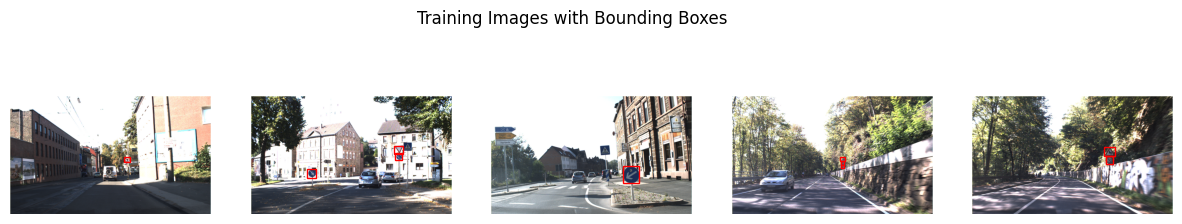

In [11]:
import matplotlib.patches as patches

def display_images_with_boxes(image_files, directory, annotations, title):
    plt.figure(figsize=(15, 3))
    for i, image_file in enumerate(image_files):
        img = Image.open(os.path.join(directory, image_file))
        plt.subplot(1, len(image_files), i+1)
        plt.imshow(img)
        # Drawing the bounding boxes
        for _, row in annotations[annotations['Filename'] == image_file].iterrows():
            plt.gca().add_patch(patches.Rectangle((row['X1'], row['Y1']), row['X2']-row['X1'], row['Y2']-row['Y1'], linewidth=1, edgecolor='r', facecolor='none'))
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Example usage with the first few images
display_images_with_boxes(train_images, train_dir, gt_data, "Training Images with Bounding Boxes")


## replicating Yolov2


In [3]:
import tensorflow as tf
tf.__version__

'2.16.1'

In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Lambda, Concatenate
from tensorflow.keras.models import Model

def reorg_layer(input_tensor, stride=2):
    """Reorganize the input tensor by stacking subregions."""
    return tf.nn.space_to_depth(input_tensor, block_size=stride)

# Model input
input_layer = Input(shape=(800, 1360, 3))

# Layers 1-26
x1 = Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu')(input_layer)
x2 = MaxPooling2D((2, 2), strides=(2, 2))(x1)
x3 = Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu')(x2)
x4 = MaxPooling2D((2, 2), strides=(2, 2))(x3)
x5 = Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu')(x4)
x6 = Conv2D(64, (1, 1), strides=(1, 1), padding='same', activation='relu')(x5)
x7 = Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu')(x6)
x8 = MaxPooling2D((2, 2), strides=(2, 2))(x7)
x9 = Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu')(x8)
x10 = Conv2D(128, (1, 1), strides=(1, 1), padding='same', activation='relu')(x9)
x11 = Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu')(x10)
x12 = MaxPooling2D((2, 2), strides=(2, 2))(x11)
x13 = Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu')(x12)
x14 = Conv2D(256, (1, 1), strides=(1, 1), padding='same', activation='relu')(x13)
x15 = Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu')(x14)
x16 = Conv2D(256, (1, 1), strides=(1, 1), padding='same', activation='relu')(x15)
x17 = Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu')(x16)
x18 = MaxPooling2D((2, 2), strides=(2, 2))(x17)
x19 = Conv2D(1024, (3, 3), strides=(1, 1), padding='same', activation='relu')(x18)
x20 = Conv2D(512, (1, 1), strides=(1, 1), padding='same', activation='relu')(x19)
x21 = Conv2D(1024, (3, 3), strides=(1, 1), padding='same', activation='relu')(x20)
x22 = Conv2D(512, (1, 1), strides=(1, 1), padding='same', activation='relu')(x21)
x23 = Conv2D(1024, (3, 3), strides=(1, 1), padding='same', activation='relu')(x22)
x24 = Conv2D(1024, (3, 3), strides=(1, 1), padding='same', activation='relu')(x23)
x25 = Conv2D(1024, (3, 3), strides=(1, 1), padding='same', activation='relu')(x24)

# Layer 26 is a route layer which fetches the output of layer 17
# In this context, we've already captured x17 for this purpose

# Layer 27: Reorg
x27 = Lambda(reorg_layer, arguments={'stride': 2}, output_shape=(400, 680, 512))(x17)

# Layer 28: Concatenate layer 25 and 27
x28 = Concatenate()([x25, x27])

# Continuing with the remaining layers
x29 = Conv2D(1024, (3, 3), strides=(1, 1), padding='same', activation='relu')(x28)
x30 = Conv2D(42, (1, 1), strides=(1, 1), padding='same', activation='relu')(x29)

# Create model
model = Model(inputs=input_layer, outputs=x30)

# Summary
model.summary()

ValueError: A `Concatenate` layer requires inputs with matching shapes except for the concatenation axis. Received: input_shape=[(None, 25, 42, 1024), (None, 400, 680, 512)]

# Training Yolov8 model

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO("yolov8n.pt")

In [ ]:
results = model.train(data="/content/sample_data/config.yaml", epochs=20)

In [ ]:
infer = YOLO("/content/runs/detect/train32/weights/best.pt")
results = infer.predict("/content/Data/images/val/0f5e9d02e8b110a5.png", save=True)